In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]

In [4]:
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

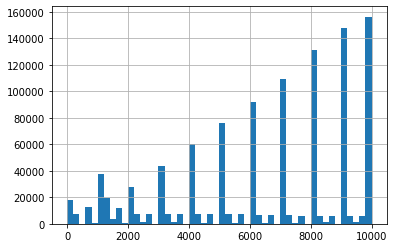

In [17]:
df["prior_question_elapsed_time"].hist(range=(0, 10000), bins=50)

In [23]:
df["1000_time"] = (df["prior_question_elapsed_time"] == 1000).astype(int)
df["1000_time"] = df.groupby("user_id")["1000_time"].cumsum()

In [27]:
df.groupby("1000_time")["answered_correctly"].describe().head(100)

,count,mean,std,min,25%,50%,75%,max
1000_time,,,,,,,,
0,8169956.0,0.621241,0.524181,-1.0,0.0,1.0,1.0,1.0
1,594570.0,0.637745,0.520679,-1.0,0.0,1.0,1.0,1.0
2,205228.0,0.638992,0.517684,-1.0,0.0,1.0,1.0,1.0
3,237211.0,0.641125,0.517117,-1.0,0.0,1.0,1.0,1.0
4,151831.0,0.645988,0.514032,-1.0,0.0,1.0,1.0,1.0
5,53531.0,0.613121,0.525774,-1.0,0.0,1.0,1.0,1.0
6,77915.0,0.648129,0.511554,-1.0,0.0,1.0,1.0,1.0
7,54779.0,0.641414,0.515723,-1.0,0.0,1.0,1.0,1.0
8,41919.0,0.612920,0.530820,-1.0,0.0,1.0,1.0,1.0


In [29]:
df[df["1000_time"] > 30]["user_id"].value_counts()

1248186110    8945
1960611280    7373
688783730     6775
723872950     6217
1400372600    5830
1181631830    4704
1586267850    4407
1589142390    4166
1541420520    3929
297688130     3823
645195940     3668
1412926620    3555
825156900     3486
930999270     2599
703264060     2521
620359420     2453
925620100     2396
501474620     2352
1996378940    2215
1541828890    2155
1660571310    2147
1900166220    2112
1201039620    1823
1681025390    1689
477605950     1568
1189197220    1558
1908119960    1430
1583912360    1422
721748760     1284
1297457400    1263
1503605110    1255
1120807190    1222
400239070     1173
994532680     1169
1647772260    1169
742566380     1168
900444150     1159
1172834070    1134
943697040     1124
368850600     1103
1843056090    1029
1014340860    1028
1001512620     992
1580044410     986
1487409590     940
1230642770     929
88600770       928
646773810      916
1868545500     877
345598550      847
1555814870     836
362680920      831
904313580   

In [30]:
df[df["user_id"] == 298845490].to_csv("038_speed_answer/298845490.csv")